In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(r"C:/Users/mdfai/Downloads/bmi.csv")

In [5]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [15]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [17]:
bins = (-1,0,1,2,3,4,5)
health = ['Malnourished', 'Underweight', 'Fit', 'Slightly Overweight', 'Overweight', 'Extremely Overweight']
data['Index'] = pd.cut(data['Index'],bins, labels = health)

In [19]:
data['Index']

0                Overweight
1                       Fit
2                Overweight
3       Slightly Overweight
4       Slightly Overweight
               ...         
495    Extremely Overweight
496              Overweight
497    Extremely Overweight
498    Extremely Overweight
499    Extremely Overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['Malnourished' < 'Underweight' < 'Fit' < 'Slightly Overweight' < 'Overweight' < 'Extremely Overweight']

In [21]:
data['Index'].value_counts()

Index
Extremely Overweight    198
Overweight              130
Fit                      69
Slightly Overweight      68
Underweight              22
Malnourished             13
Name: count, dtype: int64

In [23]:
data['Gender'].value_counts()

Gender
0    255
1    245
Name: count, dtype: int64

<Axes: ylabel='count'>

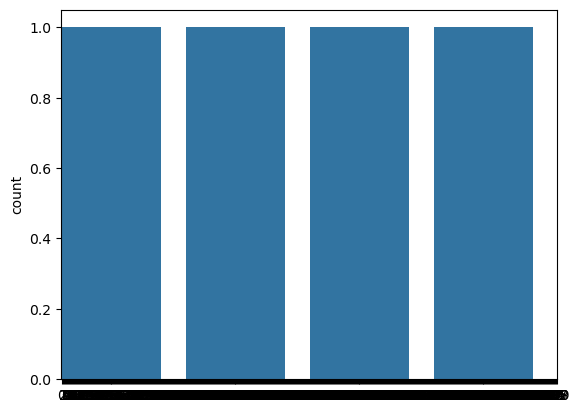

In [25]:
sns.countplot(data['Gender'])

<Axes: xlabel='count', ylabel='Index'>

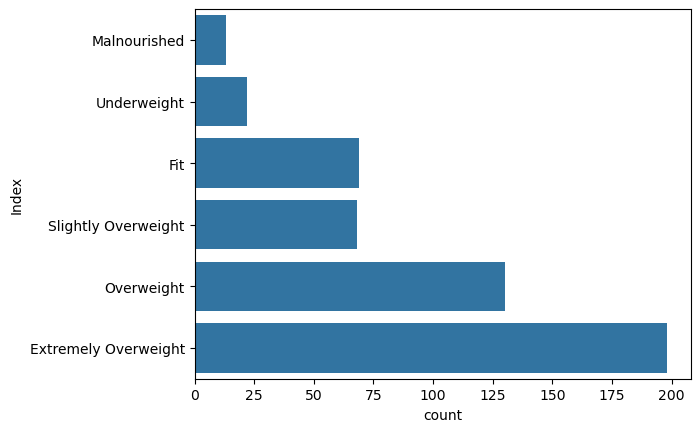

In [27]:
sns.countplot(data['Index'])

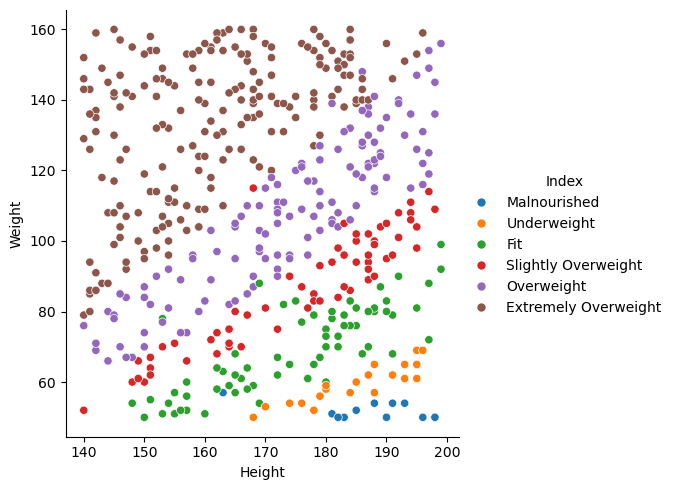

In [29]:
sns.relplot(x='Height', y='Weight', hue='Index', data=data)

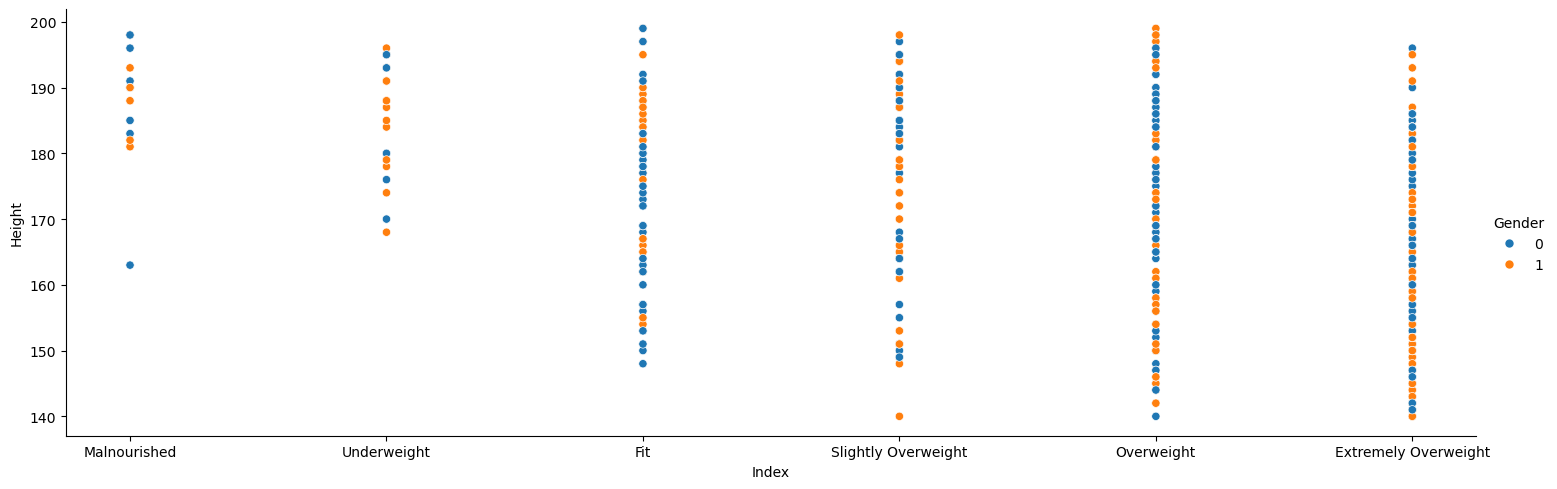

In [31]:
sns.relplot(x='Index', y='Height', hue='Gender', data=data, height = 5, aspect = 3)

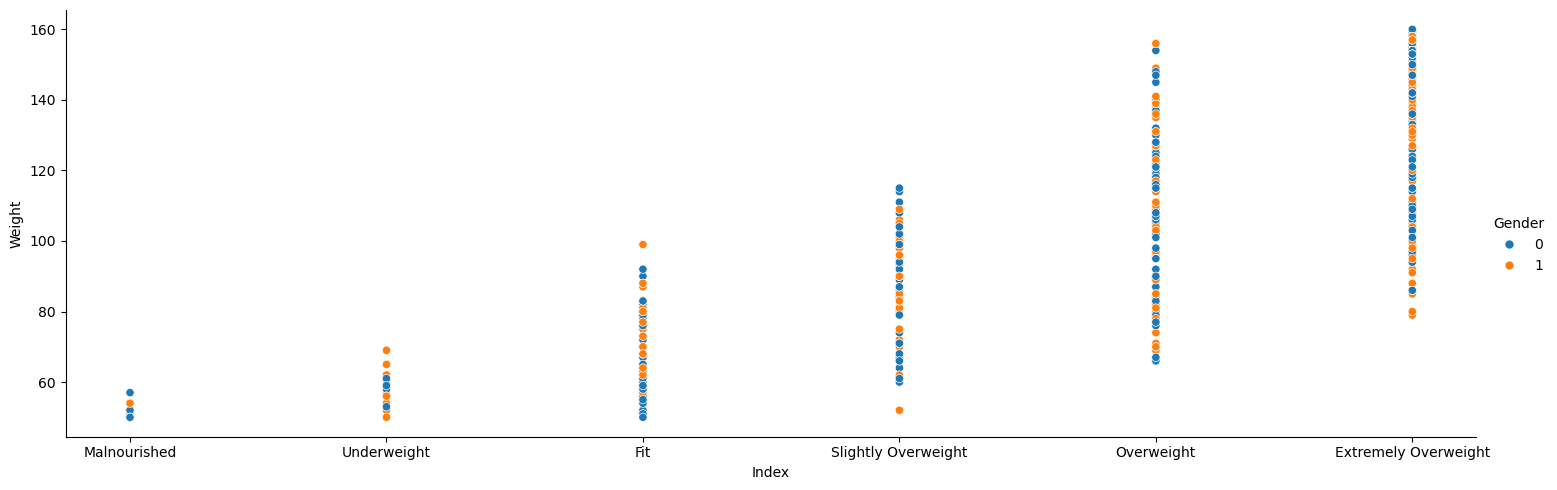

In [33]:
sns.relplot(x='Index', y='Weight', hue='Gender', data=data, height = 5, aspect = 3)

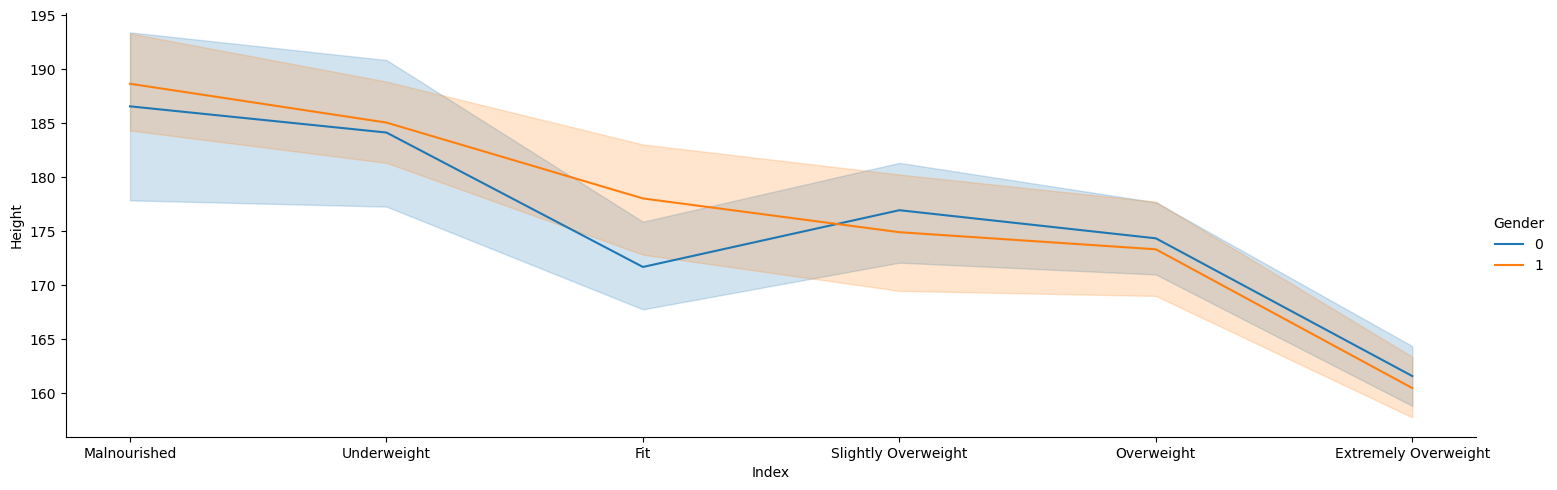

In [35]:
sns.relplot(x='Index', y='Height', hue='Gender', kind = 'line', data=data, height = 5, aspect = 3)

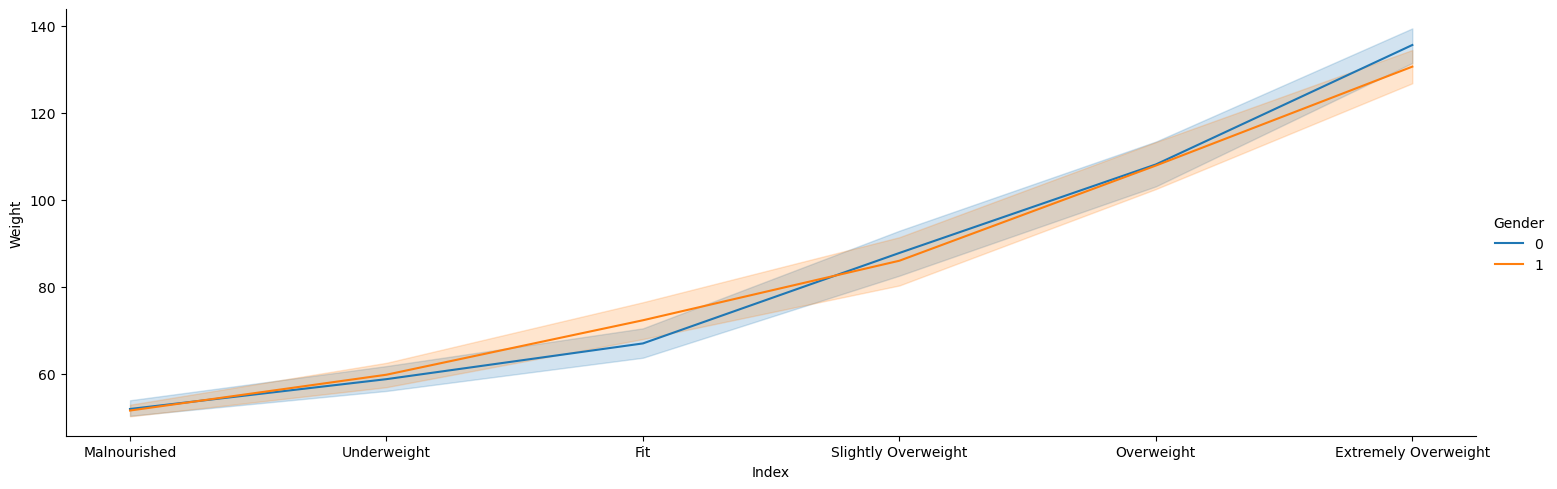

In [37]:
sns.relplot(x='Index', y='Weight', hue='Gender', kind = 'line', data=data, height = 5, aspect = 3)

In [41]:
X = data.drop('Index', axis = 1)
y = data['Index']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [47]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [49]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

Extremely Overweight       0.88      0.97      0.92        36
                 Fit       0.73      0.80      0.76        10
        Malnourished       0.00      0.00      0.00         3
          Overweight       0.96      0.78      0.86        32
 Slightly Overweight       0.78      0.93      0.85        15
         Underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



C:\Users\mdfai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mdfai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mdfai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [53]:
print(accuracy_score(y_test, pred))

0.85


In [55]:
a = [[0,160,48]]
a = s.transform(a)
b = clf.predict(a)

C:\Users\mdfai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
b

array(['Fit'], dtype=object)

In [59]:
data

,Gender,Height,Weight,Index
0,1,174,96,Overweight
1,1,189,87,Fit
2,0,185,110,Overweight
3,0,195,104,Slightly Overweight
4,1,149,61,Slightly Overweight
...,...,...,...,...
495,0,150,153,Extremely Overweight
496,0,184,121,Overweight
497,0,141,136,Extremely Overweight
498,1,150,95,Extremely Overweight
